In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
1289,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
1287,1288,0,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S


In [4]:
train_df.shape[0]

1309

In [5]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
test_df.shape[0]

418

In [7]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
train_mis = missing_values_table(train_df)
train_mis

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Cabin,1014,77.5
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1


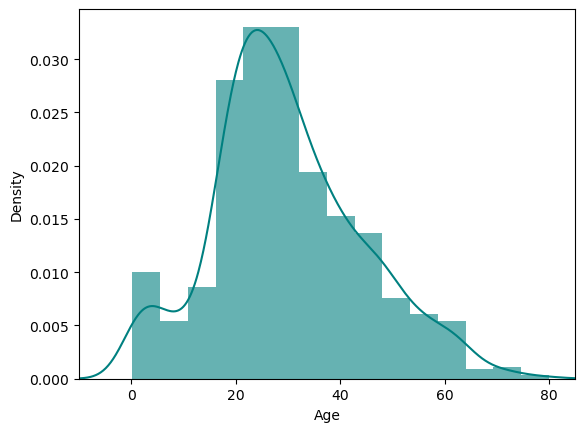

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [10]:
print(train_df["Age"].mean(skipna=True))

print(train_df["Age"].median(skipna=True))

29.881137667304014
28.0


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


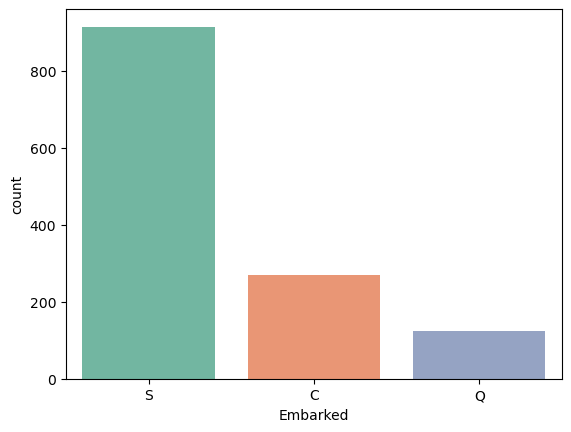

In [11]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [12]:
train_df['Embarked'].value_counts().idxmax()

'S'

In [13]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
# add Fare:
train_data['Fare'].fillna(train_df["Fare"].median(skipna=True), inplace=True)

In [14]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


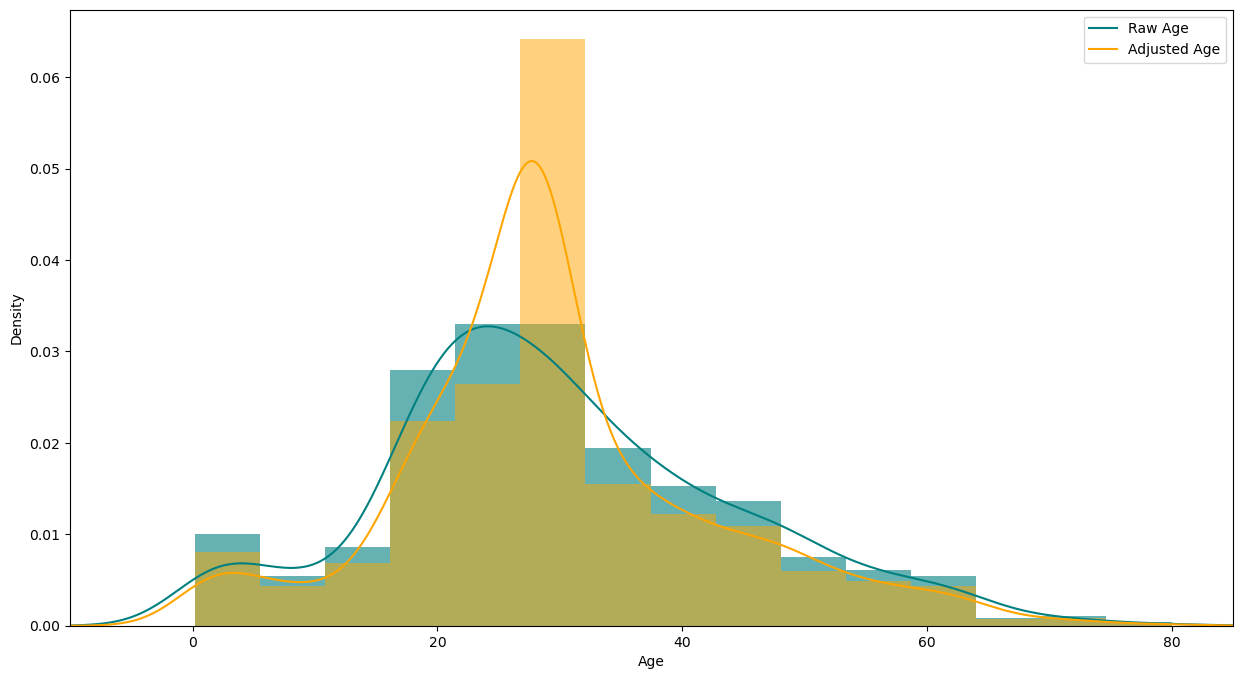

In [8]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

SibSp и Parch относятся к путешествию с семьей (возможна мультиколиниарность, поэтому обьединим в одну фичу)

In [16]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [17]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


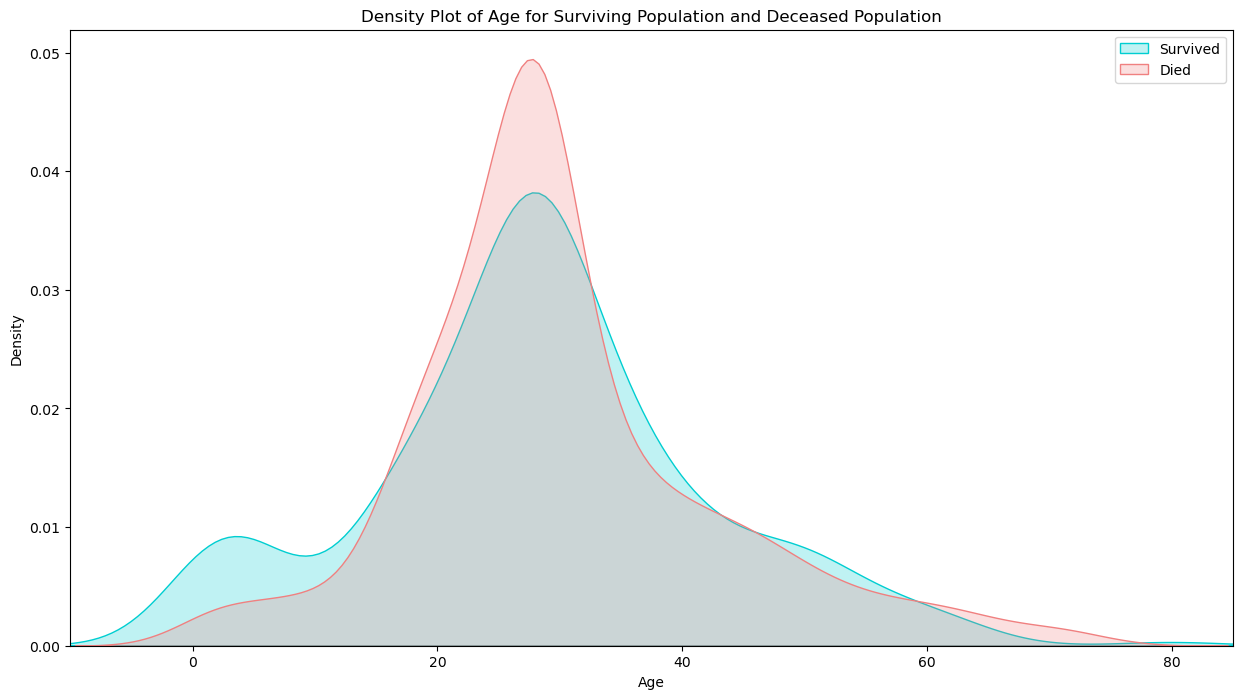

In [48]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

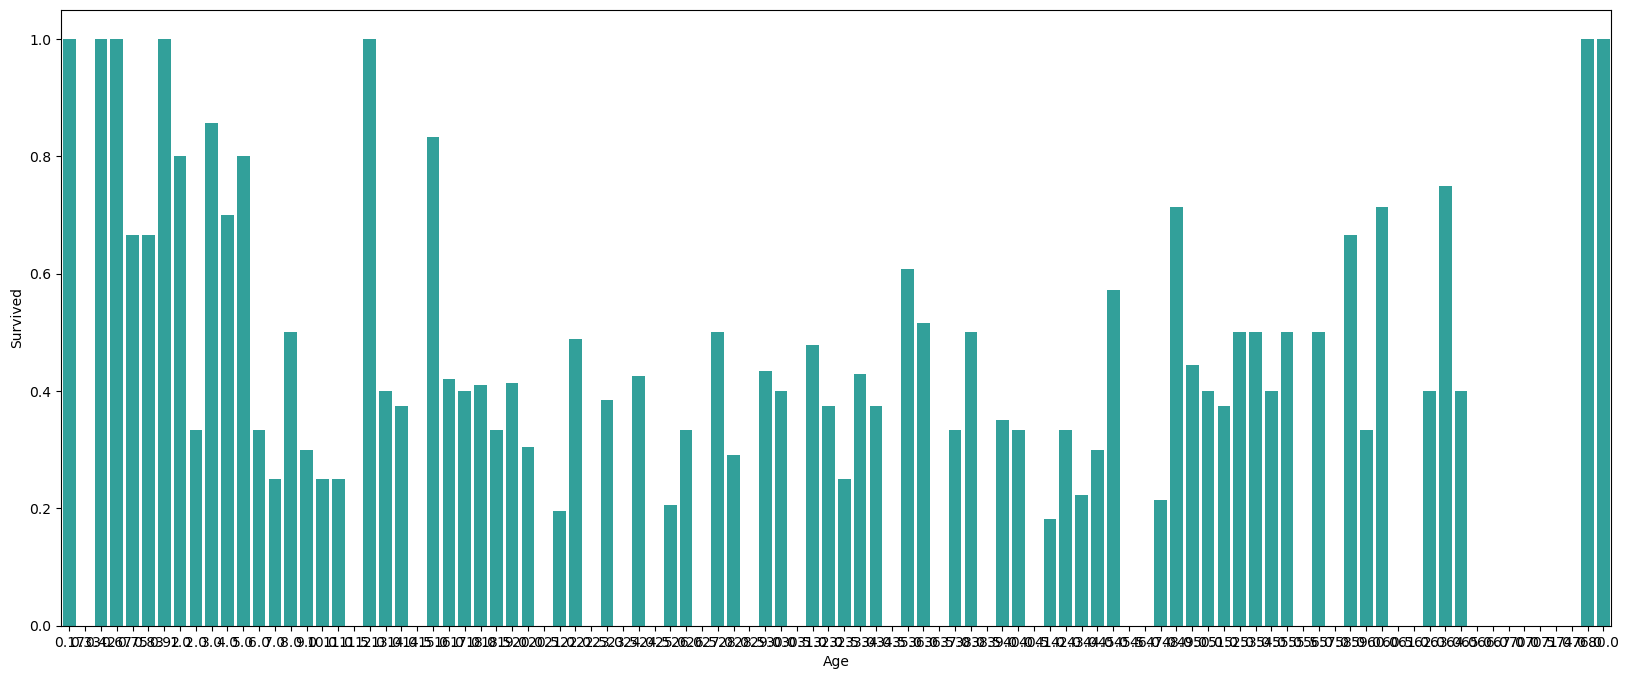

In [20]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [21]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

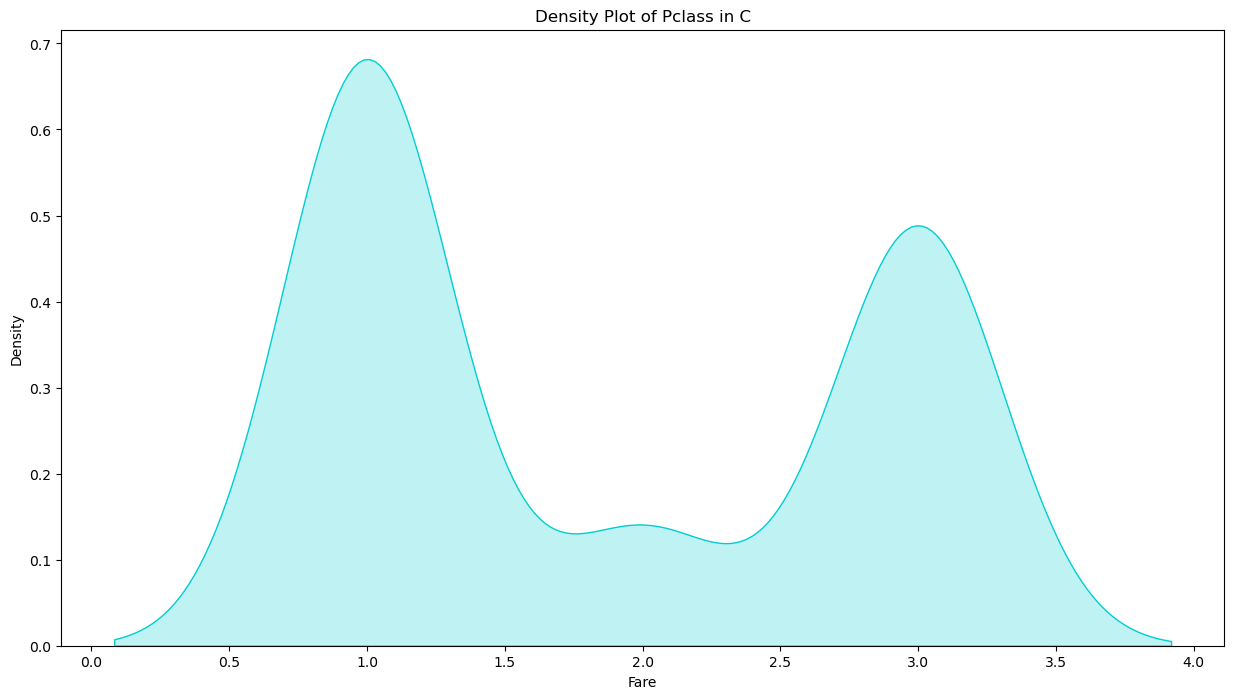

In [50]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_df["Pclass"][train_df.Embarked == 'C'], color="darkturquoise", shade=True)
plt.title('Density Plot of Pclass in C')
ax.set(xlabel='Fare')
plt.show()

In [23]:
train_df[train_df.Embarked == 'C']['Pclass'].value_counts()

Pclass
1    141
3    101
2     28
Name: count, dtype: int64

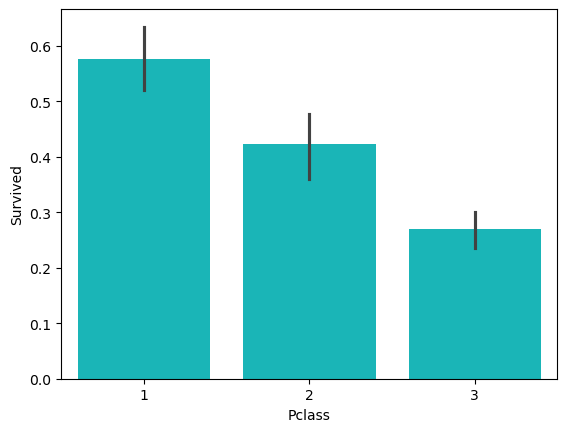

In [22]:
sns.barplot(data=train_df, x='Pclass', y='Survived', color="darkturquoise")
plt.show()

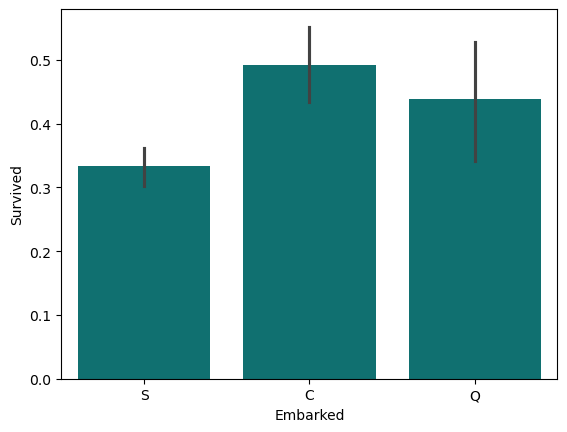

In [24]:
sns.barplot(data=train_df, x='Embarked', y='Survived', color="teal")
plt.show()

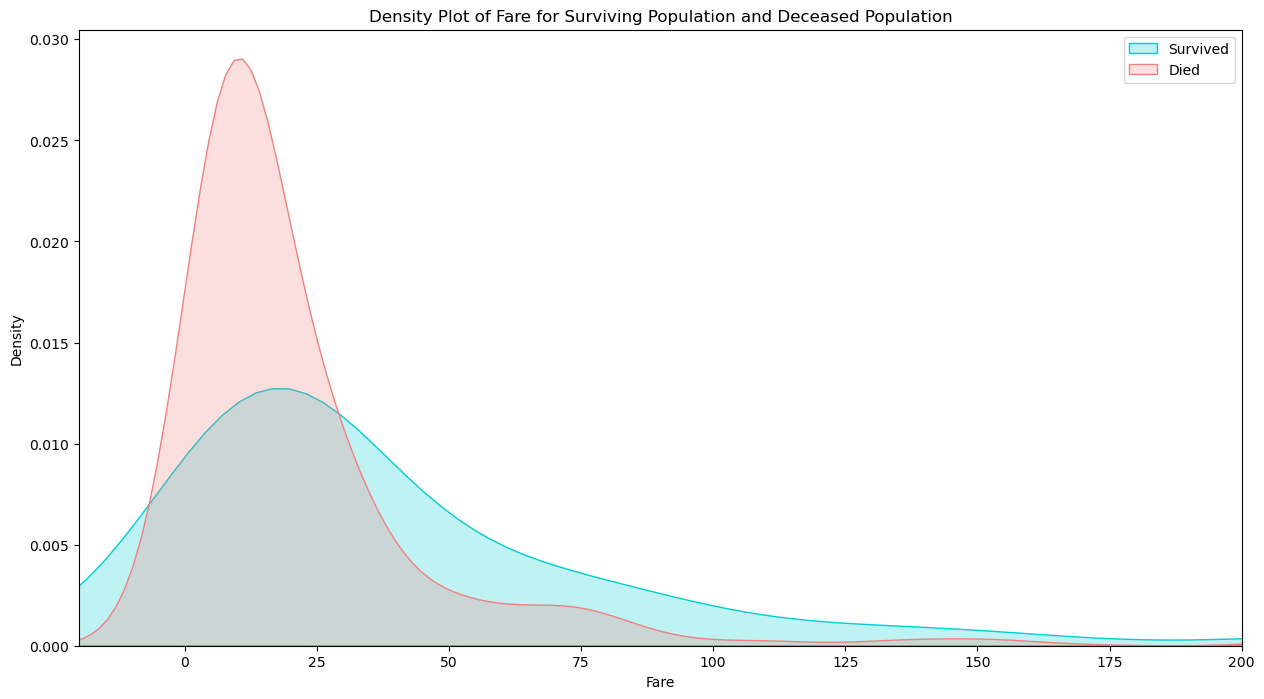

In [31]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

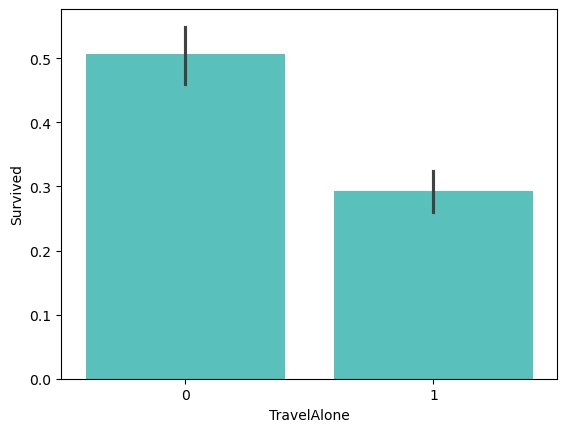

In [17]:
sns.barplot(data=final_train, x='TravelAlone', y='Survived', color="mediumturquoise")
plt.show()

# Пример дерева решений
### Цель - показать пример простого, наглядного и интерпритируемого алгоритма ML на примере Титаника

In [28]:
# Titanic extended dataset (full)
# выбираем наиболее значимые признаки (класс не учитываем, т.к. влияет цена билета
cols = ["Age","Fare","TravelAlone","Sex_male"]
X = final_train[cols]
y = final_train['Survived']

In [29]:
# Разбиваем список на две части для обучения 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7) #, 
                                                    #random_state=42)

In [30]:
X_test.sample(5)

,Age,Fare,TravelAlone,Sex_male
965,35.0,211.5000,1,False
833,23.0,7.8542,1,True
735,28.5,16.1000,1,True
834,18.0,8.3000,1,True
569,32.0,7.8542,1,True


In [32]:
# Scikit-Learn - библиотека языка Питон: алгоритмы классификации,регрессии,кластеризации
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',#  критерий расщепления: энтропия
                                                     #  - мера неопределённости распределения,
                                                     #   чем больше, тем больше хаоса)
                                max_depth = 3)       # - допустимая глубина
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

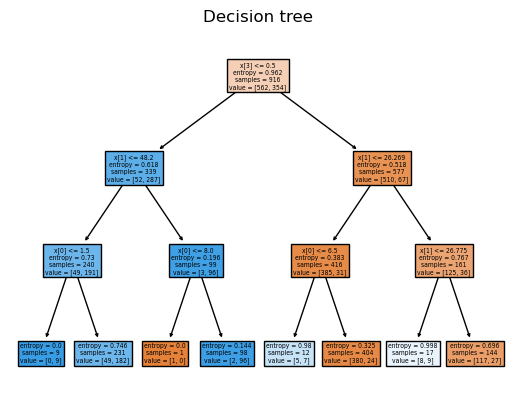

In [33]:
from sklearn import tree
tree.plot_tree(model)
from sklearn.tree import plot_tree
plot_tree(model, filled=True)
plt.title("Decision tree")
plt.show()


In [34]:
import pydot 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

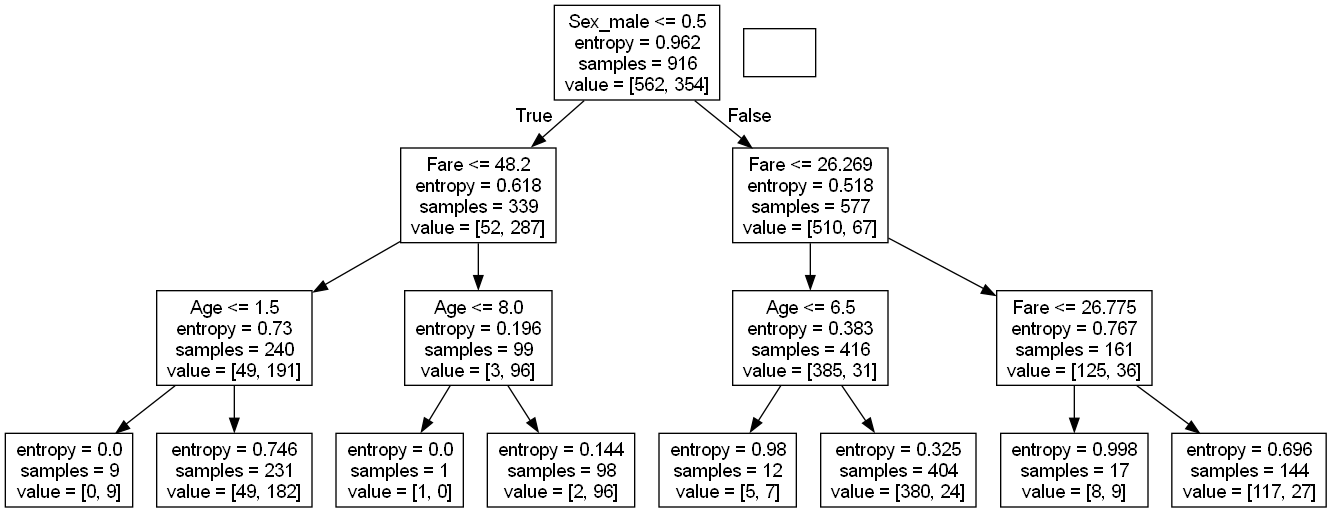

In [35]:
from six import StringIO
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, feature_names = ["Age","Fare","TravelAlone","Sex_male"])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [36]:
# строим прогноз  
y_predict = model.predict(X_test)

In [37]:
# добавляем действительные данные
X_test['y_test'] = y_test. tolist ()
# добавляем предсказанное значение
X_test['y_predict'] = y_predict. tolist ()
X_test.sample(5)

,Age,Fare,TravelAlone,Sex_male,y_test,y_predict
553,22.0,7.2250,1,True,1,0
128,28.0,22.3583,0,False,1,1
702,18.0,14.4542,0,False,0,1
1032,33.0,151.5500,1,False,1,1
1218,46.0,79.2000,1,True,0,0


In [38]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(matrix)

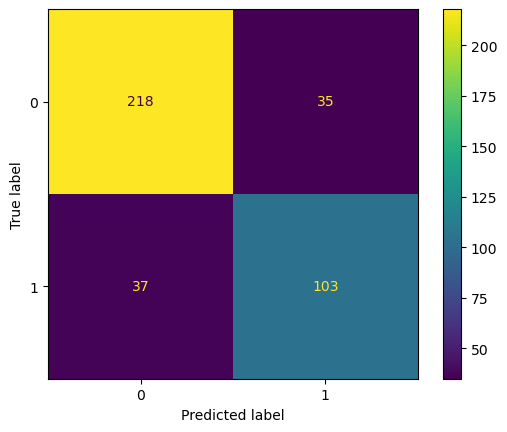

In [40]:
from matplotlib import pyplot as plt
disp.plot() 
plt.show()

<Axes: >

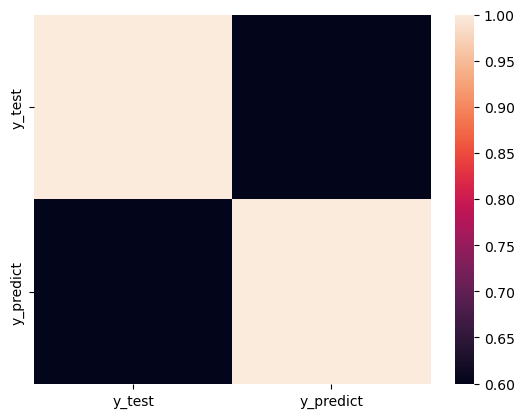

In [63]:
# посчитать корреляцию !
import numpy as np
covar = np.cov(np.array(y_test), y_predict)
from scipy import stats
corr = stats.pearsonr(np.array(y_test), y_predict)[0]

#sns.jointplot(data=X_test, x='y_test', y='y_predict', kind='reg')

my_corr = pd.DataFrame()
my_corr['y_test'], my_corr['y_predict'] = X_test['y_test'], X_test['y_predict']
sns.heatmap(my_corr.corr())

In [44]:
# Оценка точности - насколько объясняет 
from sklearn.model_selection import cross_val_score
decisiontree_scores = cross_val_score(model, X, y, cv=10)
decisiontree_scores.mean()

0.8473106283029948

In [45]:
# Импорт структуры дерева в текст - интерпретируемость:
from sklearn.tree import export_text
r = export_text(model, feature_names = ["Age","Fare","TravelAlone","Sex_male"])
print(r)

|--- Sex_male <= 0.50
|   |--- Fare <= 48.20
|   |   |--- Age <= 1.50
|   |   |   |--- class: 1
|   |   |--- Age >  1.50
|   |   |   |--- class: 1
|   |--- Fare >  48.20
|   |   |--- Age <= 8.00
|   |   |   |--- class: 0
|   |   |--- Age >  8.00
|   |   |   |--- class: 1
|--- Sex_male >  0.50
|   |--- Fare <= 26.27
|   |   |--- Age <= 6.50
|   |   |   |--- class: 1
|   |   |--- Age >  6.50
|   |   |   |--- class: 0
|   |--- Fare >  26.27
|   |   |--- Fare <= 26.77
|   |   |   |--- class: 1
|   |   |--- Fare >  26.77
|   |   |   |--- class: 0

